In [1]:
import numpy as np

# loading the saved numpy arrays from data_preprocessing.ipynb
data=np.load('data.npy')
target=np.load('target.npy')

In [2]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model = Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50, activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2, activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [3]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(data, target, test_size = 0.1)

In [4]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/20
31/31 [==============================] - 55s 2s/step - loss: 0.7123 - accuracy: 0.5224 - val_loss: 0.6120 - val_accuracy: 0.6895
INFO:tensorflow:Assets written to: model-001.model/assets
Epoch 2/20
31/31 [==============================] - 54s 2s/step - loss: 0.5261 - accuracy: 0.7200 - val_loss: 0.4724 - val_accuracy: 0.7661
INFO:tensorflow:Assets written to: model-002.model/assets
Epoch 3/20
31/31 [==============================] - 54s 2s/step - loss: 0.3510 - accuracy: 0.8440 - val_loss: 0.3848 - val_accuracy: 0.8427
INFO:tensorflow:Assets written to: model-003.model/assets
Epoch 4/20
31/31 [==============================] - 54s 2s/step - loss: 0.2995 - accuracy: 0.8737 - val_loss: 0.3137 - val_accuracy: 0.8911
INFO:tensorflow:Assets written to: model-004.model/assets
Epoch 5/20
31/31 [==============================] - 54s 2s/step - loss: 0.2221 - accuracy: 0.9185 - val_loss: 0.3245 - val_accuracy: 0.8710
Epoch 6/20
31/31 [==============================] - 54s 2s/step - lo

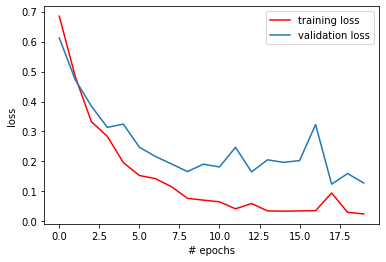

In [5]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

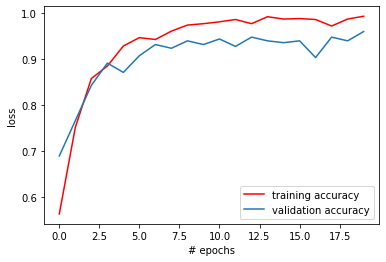

In [6]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [7]:
print(model.evaluate(test_data,test_target))

5/5 [==============================] - 2s 387ms/step - loss: 0.1516 - accuracy: 0.9493
[0.1516418159008026, 0.9492753744125366]
